In [106]:
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from copy import copy
import yaml

In [107]:
#!pip install -U sentence-transformers
!pip install torch==1.11.0+cu113 torchvision==0.12.0+cu113 torchaudio==0.11.0 --extra-index-url https://download.pytorch.org/whl/cu113 --user 

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113


In [108]:
#local
%cd "G:\Meu Drive\Obsidian\Ios3\areas\doutorado\tools"

G:\Meu Drive\Obsidian\Ios3\areas\doutorado\tools


In [109]:
!dir

 O volume na unidade G ‚ Google Drive
 O N£mero de S‚rie do Volume ‚ 1983-1116

 Pasta de G:\Meu Drive\Obsidian\Ios3\areas\doutorado\tools

08/12/2022  15:13    <DIR>          .
06/02/2023  16:58    <DIR>          ..
17/09/2022  16:33    <DIR>          teste grafo
26/10/2022  19:53    <DIR>          skills
17/09/2022  17:25               150 exportacsv.py
09/02/2023  16:53    <DIR>          F1
28/09/2022  11:32    <DIR>          F2
29/09/2022  16:11            74.584 palvras.csv
05/10/2022  18:51             2.288 Untitled-1.sty
05/10/2022  19:48                 0 4.0.0
19/10/2022  16:29            96.088 save_as_a_png.png
19/10/2022  16:34            25.496 swarm.png
02/01/2023  15:39    <DIR>          finetuning-sentiment-model-3000-samples
12/10/2022  19:15             1.977 wordcloud.png
12/10/2022  19:21           270.681 wordcloyd.png
20/10/2022  10:33            33.076 multipage_pdf.pdf
23/10/2022  11:27    <DIR>          TBXPC
13/11/2022  13:45                 0 demo_compact.ht

# Carrega dados

In [110]:
PASTA = 'F1/'

#load mechanics from csv
#GM
dfGM = pd.read_csv(PASTA + 'gm_novos_textos.csv',delimiter='|')
#dfGM["Combined"] = dfGM['Mechanics'].astype(str) +": " + dfGM["Description"]
dfGM['type'] = 'GM'
#dfGM.drop(['Description'], axis=1, inplace=True)
dfGM.reset_index(drop=True)
#dfGM.set_index(["Description", "Mechanics"], inplace = True, append = True, drop = False)

#PC
#Computational Thinking Lines
  #pc_silvajuniorbraz.csv  (linhas do autor: 4.5.2. em diante)
  #pclf.csv                (G. Computational Thinking Lines)
#GGasCT: Bringing Formal Methods to the Computational Thinking:
#pc.csv: linhas (texto longo)
#pc2.csv: termos 
#pc3.csv: pc.csv resumido - parte final
#pclf_linhas_bras a partir da pagina 8 Computational Thinking Lines: A Literature Review to Connect all the Dots
dfPC = pd.read_csv(PASTA + 'pclf_linhas_bras.csv',delimiter='|')
#dfPC["Combined"] = dfPC['Mechanics'].astype(str) +": " + dfPC["Description"]
dfPC['type'] = 'PC'
#dfPC.drop(['Description'], axis=1, inplace=True)
dfPC = dfPC.reset_index(drop=True)
dfPC.sort_values(['Mechanics'], ascending=True, inplace=True)

dfGM

,Mechanics,Description,Tax,codig,type
0,Action Points,Control what the user may do during their turn...,Evaluating,GM21,GM
1,Appointment,A mechanic in which to succeed a “player” must...,Understanding,GM51,GM
2,Behavioral Momentum,Used to give confidence and motivate players t...,Retention,GM64,GM
3,Capture-Eliminate,The strength of the player is defined by how m...,Applying,GM41,GM
4,"Cascading Information, Cut Scene, Story",Information released in minimal snippets to ga...,Retention,GM52,GM
5,Collecting,"Elements of virtual knowledge, competencies, o...",Applying,GM46,GM
6,Communal Discovery,Involves an entire community working together ...,Evaluating,GM24,GM
7,Competition,Competition could mean a player against the ot...,Evaluating,GM42,GM
8,Cooperation-Collaboration,"In cooperative games, the mechanics require pl...",Applying,GM43,GM
9,Design-editing,We define this game mechanics as the possibili...,Applying,GM11,GM


# Monta vetores

In [111]:
textoGM = []
for index, row in dfGM.iterrows():
  textoGM.append(row['Description'])

mecanicasGM = []
for index, row in dfGM.iterrows():
  mecanicasGM.append(row['Mechanics'])


textoPC = []
for index, row in dfPC.iterrows():
  textoPC.append(row['Description'])

mecanicasPC = []
for index, row in dfPC.iterrows():
  mecanicasPC.append(row['Mechanics'])


# Calcula

In [113]:
from sentence_transformers import SentenceTransformer, util
import seaborn as sns
#for long passages
#             0                                     1                           2                            3                            4
MODELSDOT = ['msmarco-distilbert-base-dot-prod-v3','multi-qa-MiniLM-L6-dot-v1','multi-qa-distilbert-dot-v1','multi-qa-mpnet-base-dot-v1','sentence-transformers/multi-qa-mpnet-base-dot-v1']
#for short passages
#            0                  1                           2                           3                   4                   5                   6                       7                        8                                           11
MODELSCOS = ['allenai-specter','msmarco-MiniLM-L12-cos-v5','msmarco-MiniLM-L6-cos-v5','stsb-roberta-large','all-MiniLM-L6-v2','all-mpnet-base-v2','msmarco-MiniLM-L-6-v3','msmarco-roberta-base-v3','all-mpnet-base-v2',
             'gtr-t5-xl','xlm-roberta-large-finetuned-conll03-english','distilbert-base-nli-stsb-mean-tokens','LaBSE','paraphrase-multilingual-MiniLM-L12-v2','cross-encoder/nli-deberta-v3-large','xlm-roberta-large','sentence-transformers/gtr-t5-xxl']
#                 9           10                                          11                                      12       13                                     14                                15                     16
#resultados COS
#modelo   #resultados   #limiar    
#0         156          0.7
#1         12           0.2
#2         23           0.2 
#3         110          0.2 *
#4         37           0.2
#5         61           0.2
#6         27           0.2
#7         4            0.2      
#8         61           0.2
#9         156          0.5

modeloEscolhido = 3
model = SentenceTransformer(MODELSDOT[modeloEscolhido],device="cuda") 

#retira / caso tenha no nome do modelo
MODELSCOS[modeloEscolhido] = MODELSDOT[modeloEscolhido].replace('/','_')

aux =[]
#teste com status (GM)
#emb1 = model.encode("Provides a sense of belonging or meaningful empowerment. Multiple forms of status, such as titles, levels, tiers, rank not just globally but also locally within a community")
for P in textoPC:
  emb1 = model.encode(P,convert_to_tensor=True)
  mPC = dfPC.loc[dfPC['Description'] == P].Mechanics.item()
  for G in textoGM:
    mGM = dfGM.loc[dfGM['Description'] == G].Mechanics.item()
    emb2 = model.encode(G, convert_to_tensor=True)
    #s = util.cos_sim(emb1, emb2)
    s = util.dot_score(emb1, emb2)
    s = s.item()
    aux.append([mPC,"GM",mGM,G,s,MODELSDOT[modeloEscolhido]])
#print("total:",conta)
df = pd.DataFrame(aux,columns=['PC','type','Mechanics','Mech_desc','score','modelo'])


#pega somene o valor mais alto de cada mecanica
df = df.loc[df['score'] >= 0.51] 
df = df.loc[df.groupby(['Mechanics'])['score'].idxmax()] 
df = df.sort_values('score')


df.to_excel(PASTA + "xlsx/bertGMLMTB" + MODELSDOT[modeloEscolhido] + ".xlsx")


In [114]:
df

,PC,type,Mechanics,Mech_desc,score,modelo
144,Decomposition,GM,Virality,Mechanics to grow player base which if done ri...,14.110412,multi-qa-mpnet-base-dot-v1
85,Automation,GM,Urgent Optimism,Used to elicit a desire to act immediately to ...,14.141584,multi-qa-mpnet-base-dot-v1
14,Abstraction,GM,Ownership (GM),Used to create loyalty of the gaming pool. The...,14.774174,multi-qa-mpnet-base-dot-v1
25,Abstraction,GM,Tile-Laying,Often drawn by the player for strategic positi...,15.037536,multi-qa-mpnet-base-dot-v1
7,Abstraction,GM,Competition,Competition could mean a player against the ot...,15.044890,multi-qa-mpnet-base-dot-v1
11,Abstraction,GM,Infinite Gameplay,Games that have no explicit end. Most applicab...,15.352592,multi-qa-mpnet-base-dot-v1
137,Decomposition,GM,Rewards,Feedback a player would receive for a worthy a...,15.391843,multi-qa-mpnet-base-dot-v1
118,Decomposition,GM,Behavioral Momentum,Used to give confidence and motivate players t...,15.492931,multi-qa-mpnet-base-dot-v1
160,Evaluation,GM,Pareto Optimal,A mechanic where the outcome is one in which n...,15.496263,multi-qa-mpnet-base-dot-v1
116,Decomposition,GM,Action Points,Control what the user may do during their turn...,15.518880,multi-qa-mpnet-base-dot-v1


# Relatório

In [96]:
df.describe()

,score
count,29.000000
mean,47.204913
std,6.010460
min,37.819717
25%,41.499966
50%,47.972454
75%,51.583637
max,57.062794


# Graficos

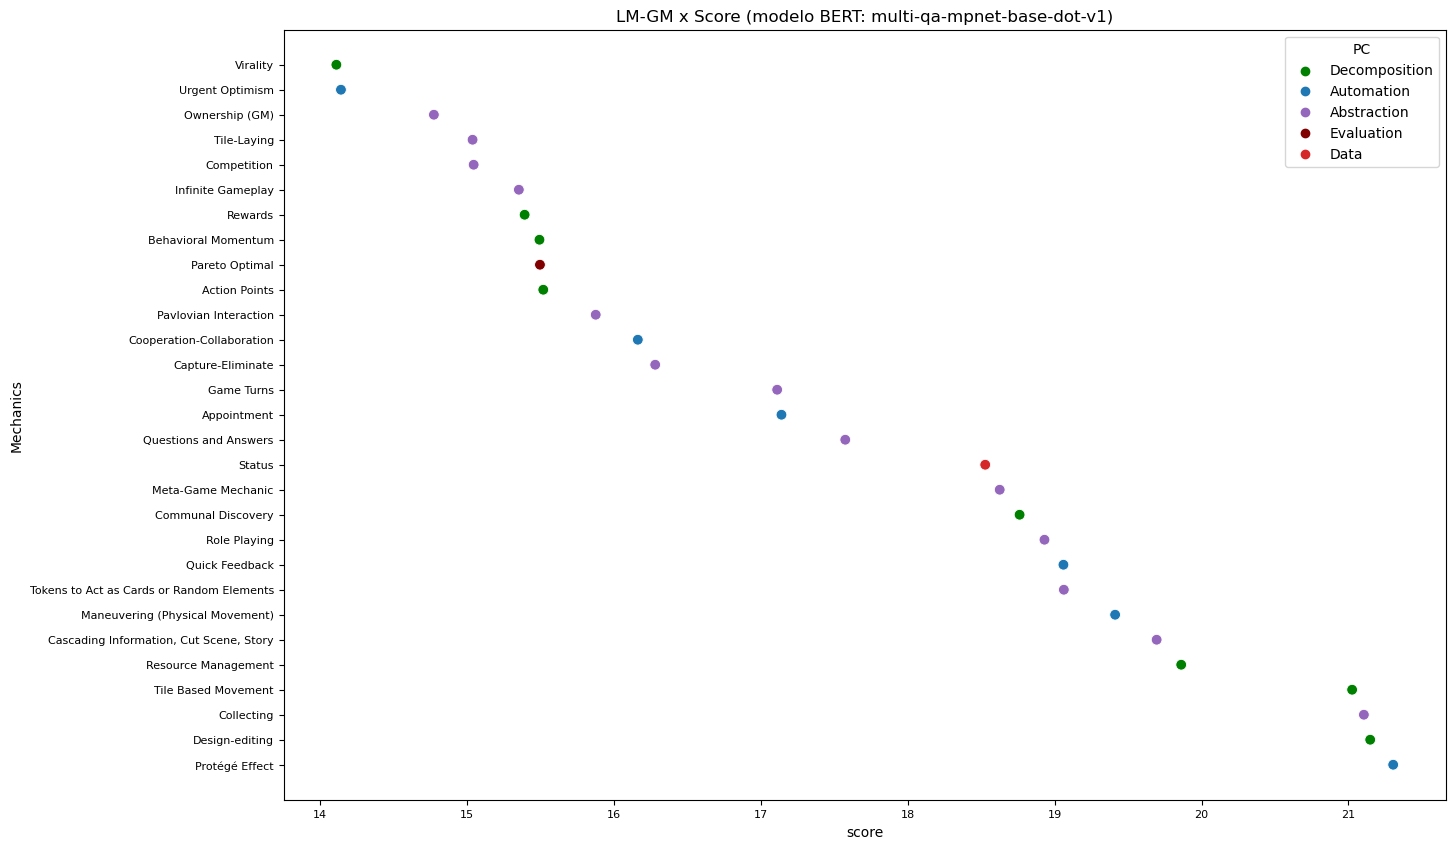

In [115]:
from matplotlib.backends.backend_pdf import PdfPages
#df = dfPrimeiro.copy('deep')
f, ax = plt.subplots(figsize=(15, 10))
ax.set_title("LM-GM x Score (modelo BERT: " + MODELSCOS[modeloEscolhido] + ")")

MODELSDOT
colors = {
  "Evaluation":"maroon",
  "Decomposition":"green",
  "Abstraction":"#9467bd",
  "Data":"#d62728",
  "Algorithm":"darkorange",
  "Automation":"#1f77b4"
}


# Draw a categorical scatterplot to show each observation
ax = sns.scatterplot(data=df, x="score", y="Mechanics", hue="PC",s=60, palette=colors)
plt.savefig(PASTA + MODELSDOT[modeloEscolhido] + '_swarmplot.pdf', bbox_inches='tight')


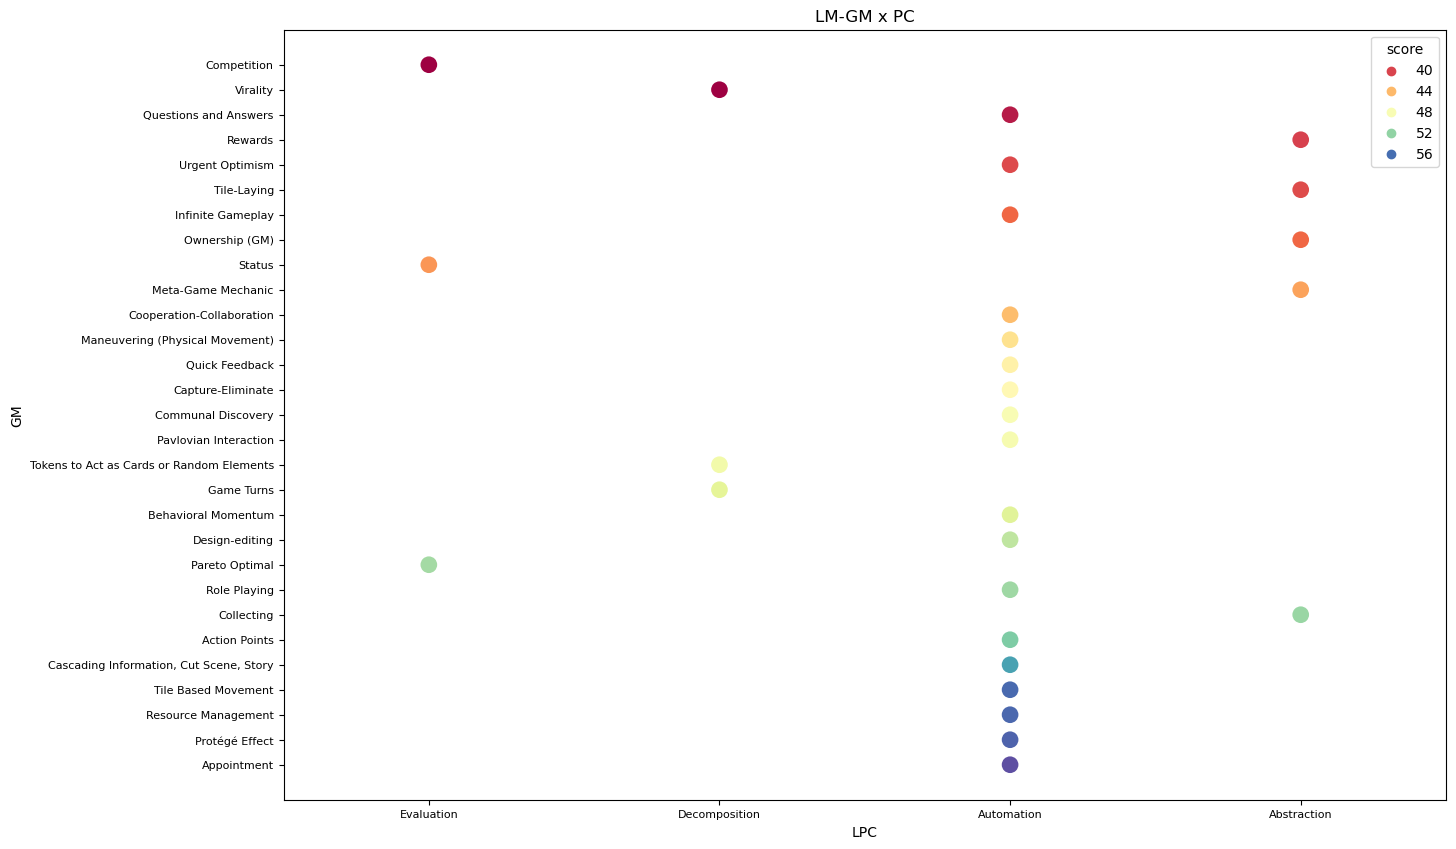

In [98]:
df = df.sort_values('score')


#df = dfPrimeiro.copy('deep')
# Draw a heatmap with the numeric values in each cell
#dados = df.pivot('GM', 'PC', 'score')
f, ax = plt.subplots(figsize=(15, 10))
ax.set_title("LM-GM x PC")



ax = sns.swarmplot(data=df, x="PC", y="Mechanics", hue="score",size=12,palette="Spectral")


plt.rc('xtick', labelsize=8) 
plt.rc('ytick', labelsize=8) 

plt.ylabel('GM', fontsize=10)
plt.xlabel('LPC', fontsize=10)
plt.savefig(PASTA + MODELSDOT[modeloEscolhido] + '_swarmplot_hue_score.pdf', bbox_inches='tight')

# Wordcloud

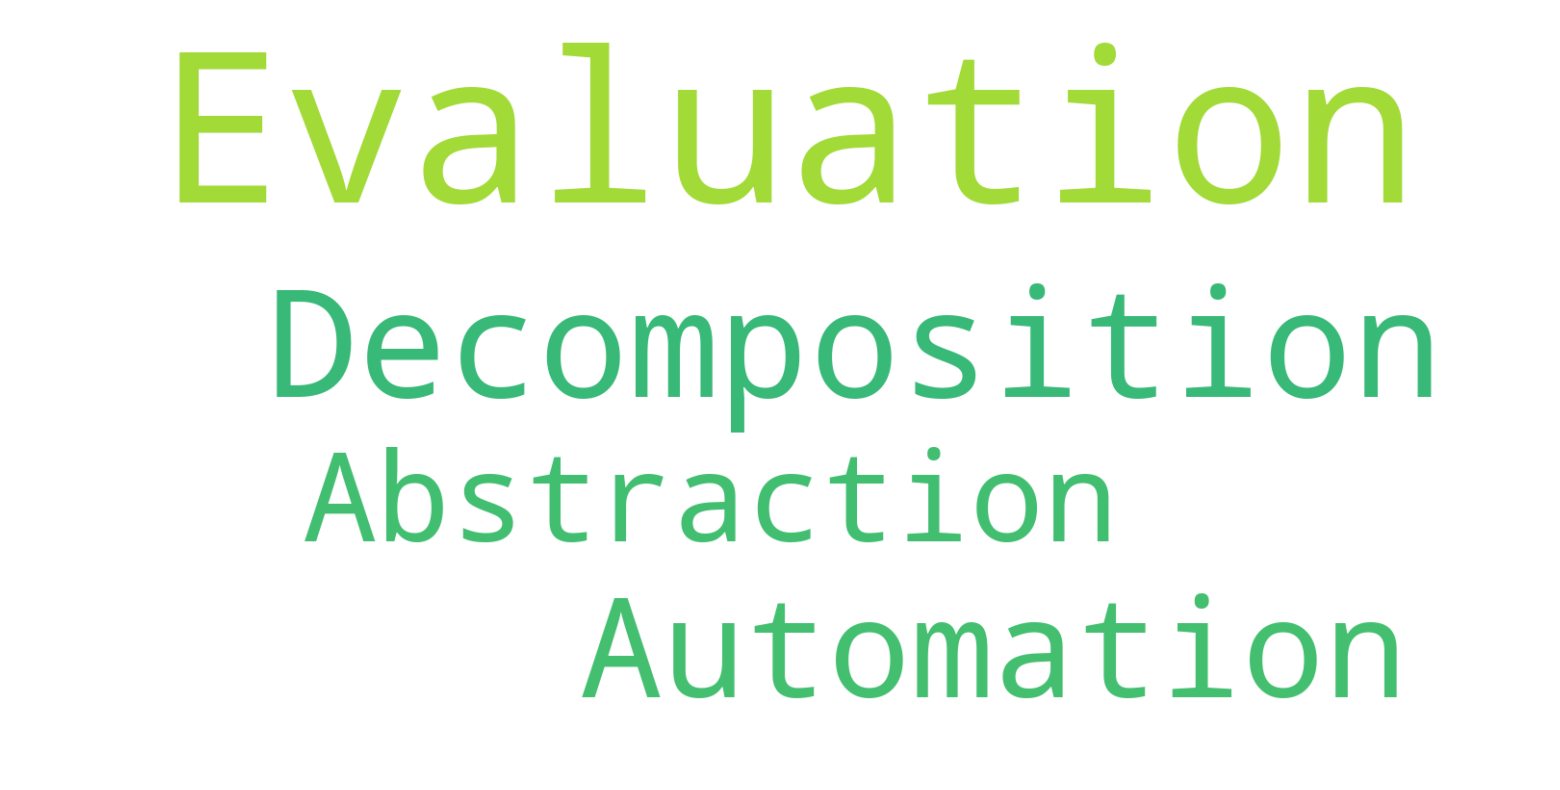

<Figure size 640x480 with 0 Axes>

In [56]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from matplotlib.pyplot import figure
#Importing Dataset

#df = dfPrimeiro.copy('deep')
#Creating the text variable

text2 = " ".join(PC for PC in df.PC)

# Creating word_cloud with text as argument in .generate() method

word_cloud2 = WordCloud(width=1600, height=800,collocations = False, background_color = 'white').generate(text2)

# Display the generated Word Cloud
plt.figure(figsize=(20,10))
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig(PASTA + MODELSDOT[modeloEscolhido] + '_wordcloud.pdf', bbox_inches='tight', dpi=300)

# Wordcloud Mech_desc

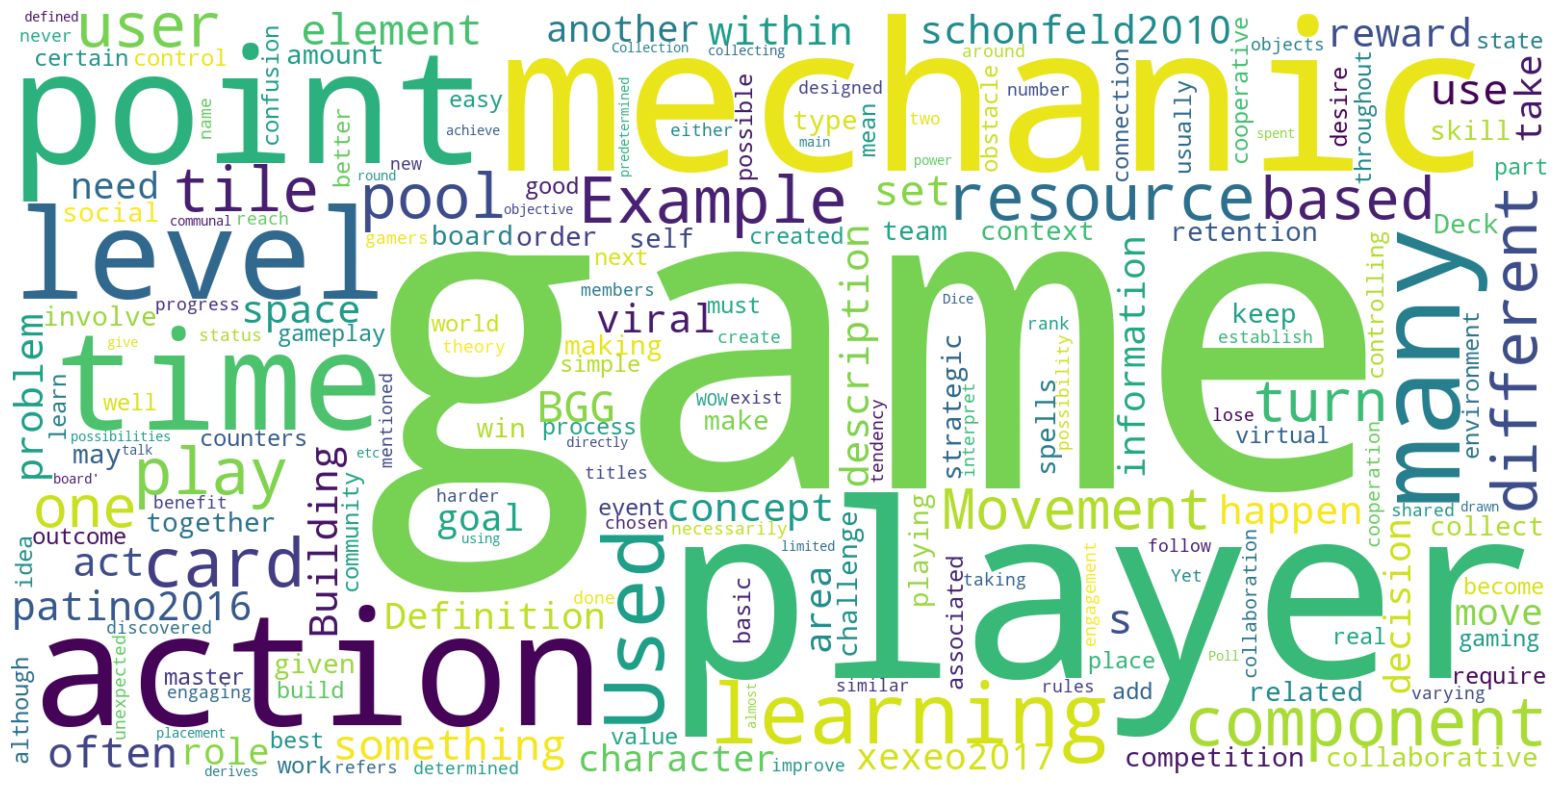

<Figure size 640x480 with 0 Axes>

In [57]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from matplotlib.pyplot import figure
#Importing Dataset

#df = dfPrimeiro.copy('deep')
#Creating the text variable

text2 = " ".join(Mech_desc for Mech_desc in df.Mech_desc)

# Creating word_cloud with text as argument in .generate() method

word_cloud2 = WordCloud(width=1600, height=800,collocations = False, background_color = 'white').generate(text2)


# Display the generated Word Cloud
plt.figure(figsize=(20,10))
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig(PASTA + MODELSDOT[modeloEscolhido] + '_wordcloud2.pdf', bbox_inches='tight', dpi=300)

# heatmap 

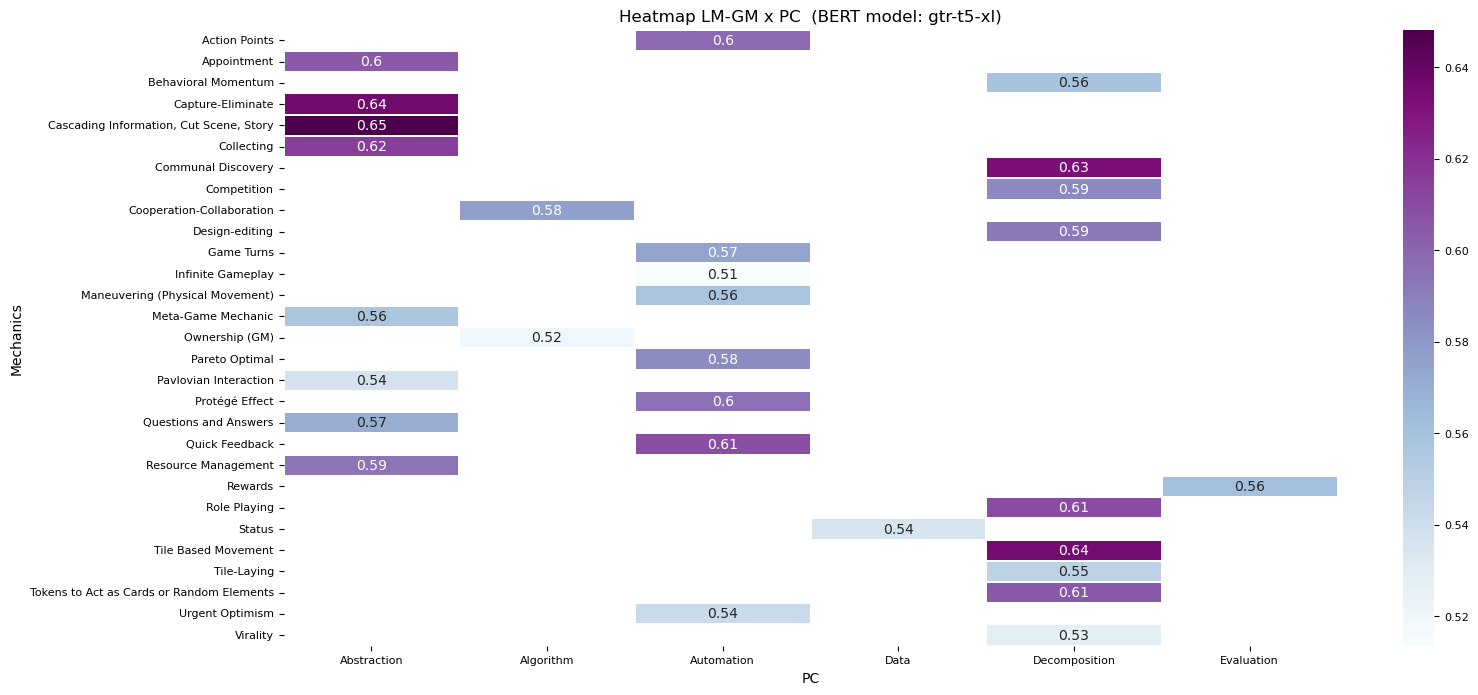

In [87]:
df = df.sort_values('score')
# Draw a heatmap with the numeric values in each cell
#df = dfPrimeiro.copy('deep')
dados = df.pivot('Mechanics', 'PC', 'score')
f, ax = plt.subplots(figsize=(17, 8))
ax.set_title("Heatmap LM-GM x PC  (BERT model: " + MODELSCOS[modeloEscolhido] + ")")
sns.heatmap(dados, annot=True, linewidths=.1, ax=ax,cmap="BuPu")
plt.savefig(PASTA + MODELSDOT[modeloEscolhido] + '_heatmap.pdf', bbox_inches='tight', dpi=300)